# Question 1
## Regression Recap

Solve this question on Kaggle! Submit your predictions in Kaggle.
Download the notebook and submit it separately along with the other questions.

https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview

Use everything that you have learnt so far.

Analyse the data. Drop, scale or normalize features. Merge features if they correlated to make some meaningful features. Use PCA to reduce the dimensionality of the problem.

Try out all the regression models. Use cross validation to find best parameters for each model.

# Question 2
## Developing an Artificial Neural Network from Scratch.

In this notebook, we will be developing a fully connected feedforward neural network.

We will import the MNIST dataset from keras datsets. The MNIST dataset contains images of 28x28 pixels each having values ranging from 0-255.
It has 60000 images in the training set and 10000 images in the test set. However, we will only use the first 10000 images for training and first 1000 images for testing because our code isn't optimized and it takes time to run. We are not looking for accuracy of our network right now, we will be doing that in the next question when we will be implementing the same using Tensorflow.


Run the first 3 cells. Your code begins after that.

In [1]:
import numpy as np
from keras.datasets import mnist
import random

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


As discussed in the class, the images are flattened to a column.

Then we are normalizing them by dividing by 255.

In [3]:
train_X=train_X.reshape(60000,784,1)    # flattening
test_X=test_X.reshape(10000,784,1)

train_y=train_y.reshape(60000,1)
test_y=test_y.reshape(10000,1)

train_X= train_X/255
test_X = test_X/255

train_X=train_X[:10000]         #taking the first 10000 images.
train_y=train_y[:10000]
test_X=test_X[:1000]
test_y=test_y[:1000]
train_data=list(zip(train_X,train_y))
test_data=list(zip(test_X,test_y))

## 2.1 Write the code for Sigmoid Function.

In [4]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

## 2.2 The Network

We will making a class called Network which has certain functions inside it. The cost function used is Cross-Entropy Loss. You need to code only the first 3. Rest are done for you.  There are various places within the code marked as stop_zone. Read the instructions below the code at those places to check whether your code till there is correct or not.

In [5]:
class Network(object):
    def __init__(self,sizes): # sizes is a list containing the network.
                              # eg : [784,128,10] means input =784 neurons,
                              #    1st hidden layer 128 neurons, output 10 neurons.
        self.sizes=sizes
        self.num_layers=len(sizes)
        self.weights= [np.random.randn(x,y) for x,y in zip(sizes[1:],sizes[:-1])]
        self.biases= [np.random.randn(x, 1) for x in sizes[1:]]
        
    def show(self):
      print(self.num_layers)
      for bias in self.biases:
          print(bias.shape)
      for weight in self.weights:
          print(weight.shape)

# stop_zone 1. Comment out all the code below. Select all rows below. Click Ctrl + /.
# Include the show function given below above this comment area inside the class.
# Run this cell and then run the code with stop_zone 1 written below.
# After this testing, don't forget to remove the comments. Same, select all, Ctrl+/.

    def forwardpropagation(self,a):
        for b,w in zip(self.biases, self.weights):
            z = np.dot(w, a) + b
            a = sigmoid(z)
            print(a.shape)
        return a

# stop_zone 2. Comment out all the code below. Don't comment out the __init__ method else you will get error.
# Remove comment from print(a.shape) line above. Run this cell. And run the code with stop_zone 2 written below.


    def backpropagation(self,x,y):

        # nothing to do in this 3 lines. it is for creating a one-hot encoded vector of the labels.
        y_t = np.zeros((len(y), 10))
        y_t[np.arange(len(y)), y] = 1
        y_t= y_t.T

        #nabla_b=dC/db and nabla_w=dC/dw. They are lists of shapes equal to that of bias and weights.
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]

        # initially, a0 = input.
        activation=x
        activation_list=[x]

        # step 1 : calculation of delta in last layer

        # write the same forward propagation code here but while doing so store the a's.
        for w,b in zip(self.weights,self.biases):
            z = np.dot(w, activation) + b
            activation = sigmoid(z)
            activation_list.append(activation)

        delta= (activation_list[-1] - y_t) * activation_list[-1] * (1 - activation_list[-1])

        # step 2 : nabla_b and nabla_w relation with delta of last layer

        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activation_list[-2].T)

        print("{} {}".format(nabla_b[-1].shape,nabla_w[-1].shape) )
#stop_zone 3 : remove comment from the print statement just above and run the cell for stop_zone3.
# don't forget commenting out.

        # step 3 : calculation of delta for hidden layers

        for j in range(2,self.num_layers):
            sig_der = activation_list[-j]*(1-activation_list[-j])
            delta= np.dot(self.weights[-j + 1].T, delta) * activation_list[-j] * (1 - activation_list[-j])

            # step 4 : nabla_b and nabla_w relation with delta of others layers
            nabla_b[-j]= delta
            nabla_w[-j]= np.dot(delta, activation_list[-j - 1].T)

        return (nabla_b,nabla_w)
#stop_zone 4 : Run the cell for stop_zone 4.

    def SGD(self, train_data,epochs,mini_batch_size, lr):
        n_train= len(train_data)
        for i in range(epochs):
            random.shuffle(train_data)
            mini_batches = [train_data[k:k + mini_batch_size] for k in range(0, n_train, mini_batch_size)]

  # Stop zone 5 : Remove comment from the next print line and comment out all the lines below it.
        print(np.array(mini_batches, dtype=object).shape)

#             for mini_batch in mini_batches:
#                 self.update_mini_batch(mini_batch,lr)

#             self.predict(train_data)
#             print("Epoch {0} completed.".format(i+1))

    # the functions below are complete. If you are fine till stop_zone 5, you can run
    # this whole cell and train, test the data by running the last cell of the notebook.
    # You may need to wait for around 10 minutes to see the test predictions.

    def update_mini_batch(self,mini_batch,lr):
        nabla_b=[np.zeros(b.shape) for b in self.biases]
        nabla_w=[np.zeros(w.shape) for w in self.weights]
        for x,y in mini_batch:
            delta_b,delta_w= self.backpropagation(x,y)
            nabla_b=[nb+ db for nb,db in zip (nabla_b,delta_b)]
            nabla_w=[nw+dw for nw,dw in zip(nabla_w,delta_w)]

        self.weights=[w- lr*nw/len(mini_batch) for w,nw in zip(self.weights,nabla_w)]
        self.biases=[b-lr*nb/len(mini_batch) for b,nb in zip(self.biases,nabla_b)]

    def predict(self,test_data):
        test_results = [(np.argmax(self.forwardpropagation(x)),y) for x,y in test_data]
        # returns the index of that output neuron which has highest activation

        num= sum(int (x==y) for x,y in test_results)
        print ("{0}/{1} classified correctly.".format(num,len(test_data)))



In [6]:
# stop_zone 1

# def show(self):
#   print(self.num_layers)
#   for bias in self.biases:
#       print(bias.shape)
#   for weight in self.weights:
#       print(weight.shape)

# Copy this show function from here. Paste it inside that Network Class.
# Comment out the show function here. Run this cell.

net=Network([784,128,64,10])
net.show()

# The desired output is :
# 4
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

# Keeping the show function over there in the Network class doesn't make any
# difference. You may delete it if you wish. Better toss a coin.

4
(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [7]:
# stop_zone 2
# to use this, make sure your data is loaded. Run this cell.
net=Network([784,128,64,10])
print(train_X[0])
net.forwardpropagation(train_X[0])

# The desired output is :
# (784, 1)
# (128, 1)
# (64, 1)
# (10, 1)
#  If you are getting this, you are correct. Proceed to forwardpropagation.

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.  

array([[0.99630807],
       [0.36317463],
       [0.99803727],
       [0.99999947],
       [0.74414712],
       [0.88035271],
       [0.43152862],
       [0.0983643 ],
       [0.00391487],
       [0.99997227]])

In [8]:
# stop_zone 3
net=Network([784,128,64,10])
net.backpropagation(train_X[0],train_y[0])

# Desired output : (10,1) (10,64)

([array([[-3.53121474e-08],
         [ 2.01776401e-02],
         [ 1.06996979e-02],
         [-8.23229529e-04],
         [-1.06745133e-08],
         [ 2.82469720e-10],
         [-1.18076245e-03],
         [-3.35224945e-04],
         [-2.85483441e-06],
         [-1.92142218e-05],
         [-1.40033624e-05],
         [ 1.35117215e-02],
         [-2.69585137e-05],
         [ 2.53913578e-02],
         [ 1.09919407e-03],
         [-5.11173203e-03],
         [-5.09047513e-05],
         [ 8.21212976e-03],
         [-3.45473263e-02],
         [-3.30338820e-07],
         [-6.45449940e-03],
         [-1.67345657e-03],
         [ 3.07883447e-04],
         [ 5.88440888e-10],
         [ 4.99747485e-04],
         [-1.18261450e-04],
         [ 9.77472385e-06],
         [-1.44164943e-06],
         [ 1.46392365e-06],
         [-1.30931006e-05],
         [ 3.62799964e-06],
         [ 3.03632032e-03],
         [-2.17612377e-05],
         [-9.89488940e-04],
         [ 2.95285948e-06],
         [-6.8751841

In [9]:
# stop_zone 4
net=Network([784,128,64,10])
nabla_b,nabla_w=net.backpropagation(train_X[0],train_y[0])
for nb in nabla_b:
  print(nb.shape)
for nw in nabla_w:
  print(nw.shape)

# Desired output:
# (128, 1)
# (64, 1)
# (10, 1)
# (128, 784)
# (64, 128)
# (10, 64)

(128, 1)
(64, 1)
(10, 1)
(128, 784)
(64, 128)
(10, 64)


In [10]:
# Stop zone 5 :  Run this cell, for 10000 samples and batch size of 20, output should be
#       (500,20,2).  500 batches each of size 20 and has 2 objects : train and test data.

net=Network([784,256,128,64,10])
net.SGD(train_data=train_data,epochs=20,mini_batch_size=20,lr=0.01)

(500, 20, 2)


In [11]:
net=Network([784,128,64,10])
net.SGD(train_data=train_data,epochs=10,mini_batch_size=20,lr=0.01)
print("Test data:")
net.predict(test_data)

(500, 20, 2)
Test data:
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(

(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)
(128, 1)
(64, 1)
(10, 1)


# End of question 2.

# Question 3

1. Load the MNIST dataset as in the previous question.
2. Visualize the first 20 images of both train and test data using plt.imshow()
3. Choose any of tensorflow and pytorch.
4. The architecture :
> input layer (optional) <br/>
> flatten layer <br/>
> some hidden dense layers (tensorflow) <br/> **OR** <br/>
> some linear layers with non linear activation (pytorch) <br/>
> output dense/linear layer of 10 neurons.

5. For Tensorflow or PyTorch, you may either use Sequential API or Functional API to define the model.<br/>
However, for PyTorch, you need to load the data as a torch Dataset and access using a DataLoader function and then iterate over the data to train.

6. Normalize the images before training.
7. While training, use Adam Optimizer and Sparse Categorical Cross Entropy Loss function (Tensorflow) / Cross Entropy Loss (Pytorch).

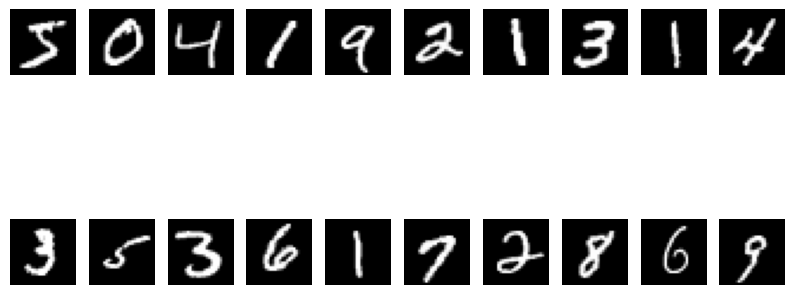

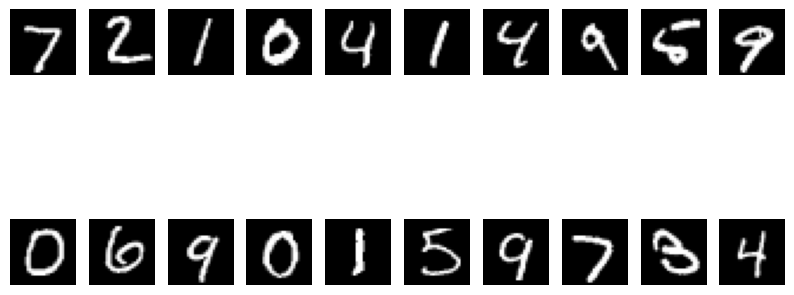

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2638 - accuracy: 0.9249
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1174 - accuracy: 0.9654
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0803 - accuracy: 0.9758
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0598 - accuracy: 0.9814
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0464 - accuracy: 0.9857
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0292 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0192 - accuracy: 0.9940
Epoch 10/10
313/313 [==============================] - 1s 3ms/step - loss: 0.0896 

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

# Visualize the first 20 images of the training set
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(train_X[i], cmap='gray')
    plt.axis('off')
plt.show()

# Visualize the first 20 images of the test set
plt.figure(figsize=(10, 5))
for i in range(20):
    plt.subplot(2, 10, i+1)
    plt.imshow(test_X[i], cmap='gray')
    plt.axis('off')
plt.show()

# Normalize the images
train_X = train_X / 255.0
test_X = test_X / 255.0

# Flatten the images
train_X = train_X.reshape(-1, 784)
test_X = test_X.reshape(-1, 784)

# Create the model using Sequential API in TensorFlow
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_X, train_y, epochs=10, batch_size=32)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_X, test_y)
print("Test accuracy:", test_acc)